<img src="https://drive.google.com/uc?id=10ktSa_7Q-A6sgBICdiN9DhAns1vrjxVo" width="500">

## Aula interna de PyTorch

> *Autores: Edu, Enzo, Paulo e Wesley*



## Tensores

Antes de começar a implementar códigos e trabalharmos em cima das propriedades dos tensores em Torch acho importante em um primeiro momento esclarecermos duas perguntas: O que é um tensor? E, qual a diferença de tensores em NumPy e em PyTorch ?


### 1. O que são tensores ?

<img src="https://drive.google.com/uc?id=1-XwvVjLsNe8Gj_cABRVwXlsz8hEW3t-R" width='500'>

Tensores são uma generalização do conceito de escalares (0D), vetores (1D) e matrizes (2D) para maiores dimensões, embora haja alguns detalhes entre a definição matemática e o que realmente usamos pode-se dizer que um tensor é um *conteiner* de dados em N dimensões e geralmente nos referimos a um tensor quando existem 3 ou mais dimensões envolvidas.

<img src="https://drive.google.com/uc?id=1AUtY7PNJdplrI0sqSghcG8oUSZpurenJ" width="500">

**FUEN FUEN FUEN ALERTA DE NERD !!!**

Entrando em um ponto um pouco mais técnico, além dos dados que o tensor consegue segurar, a ele também estão definidos algumas transformações lineares válidas entre tensores como o produto escalar ($\cdot$) e o produto vetorial ($\times$).

### 2. Numpy vs. Torch

Agora falando um pouco mais computacionalmente, tensores em PyTorch são extremamente semelhantes aos `ndarrays` do NumPy quanto ao quesito de manipulação e operações que você pode realizar, porém um ponto crucial da vantagem do PyTorch é que estes tensores podem ser processados em GPU (Unidade de Processamento Gráfica), que torna os cálculos envolvidos dentro de Machine Learning bem mais rápido pelo falo das GPUs serem otimizadas para paralelização, ou seja, podem realizar vários cálculos simultâneamente.

Acho que o melhor jeito de explicar isso é assistindo [este vídeo](https://www.youtube.com/watch?v=-P28LKWTzrI).

## Propriedades dos Tensores

Nessa parte a ideia principal é mostrar um pouco como são feitas as manipulações desses tensores e algumas operações interessantes que o PyTorch propicia, principalmente a integração dos tensores em PyTorch serem contemplados pelas tecnologias de GPU, podendo ser processados muito mais rapidamente.

In [ ]:
import torch
import numpy as np

### 1. Declaração de tensores

Existem várias formas de se declararem os tensores em PyTorch, podendo desde alocar um espaço vazio, iniciar uma matriz aleatória, definir ser próprio tensor a partir de arranjo de listas em Python e ainda ter uma comunicação com as funcionalidades de NumPy

Primeiro vou começar só mostrando algumas funções que podem ser úteis ocasionalmente, porém bem por cima já que o foco é justamente usar as integrações com NumPy para fazermos *machine learning*

In [ ]:
x = torch.empty(5, 3) #Inicia um vetor com valores não inicializados --> com os valores que já estavam naquela posição da memória
y =  torch.rand(5, 3) #Inicia um vetor com valores aleatórios
z = torch.randn(5, 3) #Inicia um vetor com valores aleatórios Normalmente distribuídos
i =  torch.ones(5, 3) #Inicia um vetor de 1s
j = torch.zeros(5, 3) #Inicia um vetor de 0s

print("Tensor x: \n" + str(x), end='\n\n')
print("Tensor y: \n" + str(y), end='\n\n')
print("Tensor z: \n" + str(z), end='\n\n')
print("Tensor i: \n" + str(i), end='\n\n')
print("Tensor j: \n" + str(j), end='\n\n')

Tensor x: 
tensor([[3.5610e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 1.1799e-35]])

Tensor y: 
tensor([[0.9233, 0.1643, 0.0775],
        [0.4079, 0.8822, 0.2316],
        [0.6112, 0.7398, 0.4804],
        [0.8606, 0.8694, 0.0656],
        [0.2568, 0.7682, 0.5517]])

Tensor z: 
tensor([[ 8.7006e-01,  7.5909e-01,  3.3861e-01],
        [ 1.8587e-01,  6.8591e-01, -3.0263e-01],
        [-4.0563e-01,  8.2349e-01, -4.9515e-01],
        [ 1.9382e-04,  3.3928e-01,  3.6205e-01],
        [ 5.3234e-01, -1.3152e+00, -9.7296e-01]])

Tensor i: 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Tensor j: 
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])



Apesar dessas funções serem úteis o mais interessante é você poder fazer essa integração para tensores a partir dos seus próprios dados

In [ ]:
exemplo = torch.tensor(
    [
     [[1, 2], [3, 4]], 
     [[5, 6], [7, 8]], 
     [[9, 0], [1, 2]],
    ]
)

print(exemplo)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]],

        [[9, 0],
         [1, 2]]])


In [ ]:
#Podemos ainda fazer uma integração entre NumPy e PyTorch com muita facilidade

a = torch.ones(3, 2, 2)
b = a.numpy() #Converte de tensor --> ndarray

print("a:", type(a), "\nb:", type(b))

c = np.ones((3, 2, 2))
d = torch.from_numpy(c) #Converte de ndarray --> tensor

print("\nc:", type(c), "\nd:", type(d))

a: <class 'torch.Tensor'> 
b: <class 'numpy.ndarray'>

c: <class 'numpy.ndarray'> 
d: <class 'torch.Tensor'>


### 2. Operações com os tensores

Com os tensores a principal ideia é fazer operações matemáticas com eles, para isso a maioria das operações já conhecidas do NumPy como multiplicações e adições podem ser facilmente utilizadas.

In [ ]:
tensor_1 = torch.tensor(
    [
     [1, 2],
     [3, 4],
    ], dtype=torch.float64 #Especifíca o tipo do tensor como de floats
)

tensor_2 = torch.tensor(
    [
     [5, 6],
     [7, 8]
    ], dtype=torch.float64
)

print(tensor_1, "---> Tensor 1")
print()
print(tensor_2, "---> Tensor 2")
print()
print(torch.add(tensor_1, tensor_2), "---> Soma de tensores")
print()
print((torch.add(tensor_1, tensor_2) - 5)*2, "---> Operações elemento a elemento")
print()
print(tensor_1.mean(), "---> Média")
print()
print(tensor_2.std(), "---> Desvio Padrão")

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64) ---> Tensor 1

tensor([[5., 6.],
        [7., 8.]], dtype=torch.float64) ---> Tensor 2

tensor([[ 6.,  8.],
        [10., 12.]], dtype=torch.float64) ---> Soma de tensores

tensor([[ 2.,  6.],
        [10., 14.]], dtype=torch.float64) ---> Operações elemento a elemento

tensor(2.5000, dtype=torch.float64) ---> Média

tensor(1.2910, dtype=torch.float64) ---> Desvio Padrão


In [ ]:
flat_1 = torch.flatten(tensor_1) #Função que converte o tensor em um tensor 1D
flat_2 = tensor_1.view([4]) #É possível usar também a funçar view para redimensionar

print(flat_1, "---> Flat 1")
print()
print(flat_2, "---> Flat 2")
print()
print(torch.dot(flat_1, flat_2), "---> Produto escalar")
print()

tensor([1., 2., 3., 4.], dtype=torch.float64) ---> Flat 1

tensor([1., 2., 3., 4.], dtype=torch.float64) ---> Flat 2

tensor(30., dtype=torch.float64) ---> Produto escalar



O PyTorch ainda pode receber uma função do tipo `operation_` esse `_` indica uma operação *inplace*, ou seja, ela altera o tensor passado ao invés de criar um novo.

In [ ]:
#Existem diversas sintaxes para fazer uma mesma operação

print("tensor_1 + tensor_2")
print(tensor_1 + tensor_2, end='\n\n')

print("torch.add(tensor_1, tensor_2)")
print(torch.add(tensor_1, tensor_2), end='\n\n')

print("tensor_1.add_(tensor_2) --> Operação inplace")
print(tensor_1.add_(tensor_2), end='\n\n')

print("tensor_1 --> Tensor mudou")
print(tensor_1)

tensor_1 + tensor_2
tensor([[ 6.,  8.],
        [10., 12.]], dtype=torch.float64)

torch.add(tensor_1, tensor_2)
tensor([[ 6.,  8.],
        [10., 12.]], dtype=torch.float64)

tensor_1.add_(tensor_2) --> Operação inplace
tensor([[ 6.,  8.],
        [10., 12.]], dtype=torch.float64)

tensor_1 --> Tensor mudou
tensor([[ 6.,  8.],
        [10., 12.]], dtype=torch.float64)


## CUDA tensors

Uma das principais vantagens de se utilizar PyTorch é que os tensores podem ser processados dentro das GPUs (unidade gráfica que acelera as computações) e isso acelera bastante todas as operações tensoriais, mas veremos isso com mais detalhes um pouco a frente.

In [ ]:
#Checa se GPU está disponível
#Para o Colab você deve checar se seu ambiente está com GPU ativada

print("GPU disponível ?:", torch.cuda.is_available())

tensor = torch.tensor(
    [
     [[1, 2], [3, 4]], 
     [[5, 6], [7, 8]], 
     [[9, 0], [1, 2]]
    ],
    device = 'cuda' #Permite que o tensor seja operado na GPU
)

print("Dispositivo do meu tensor:", tensor.device)

#Método para alterar o dispositivo
tensor_cpu = tensor.to(torch.device('cpu'))

print("Dispositivo do meu tensor:", tensor_cpu.device)

GPU disponível ?: True
Dispositivo do meu tensor: cuda:0
Dispositivo do meu tensor: cpu


## O que faz o PyTorch ser capaz de treinar redes neurais?

O ponto central do PyTorch é a capacidade de realizar diferenciação automática, mais especificamente, backpropagation, que é feito pelo módulo interno da biblioteca chamado autograd, o que permite treinar os modelos.

Para isto, ao realizar operações com tensores, um grafo computacional é criado para registrar as operações feitas e, assim, realizar backpropagation para calcular os gradientes em relação aos tensores necessários.

## Exemplo de diferenciação automática

Observe a expressão $z = x^2 + 3y$

Ela pode ser representada por meio do seguinte grafo


<img width="25%" src="https://i.ibb.co/c1728sz/graph-1.png"/>

Agora imagine que nós queiramos calcular as derivadas $\frac{\partial z}{\partial x}$ e $\frac{\partial z}{\partial y}$, quando $ x = 3 $ e $ y = 4 $.

Para isto, iremos utilização o algoritmo de backpropagation, ou diferenciação automática reversa, onde partimos do final do gráfico e seguimos o caminho contrário até chegar na variável de interesse, no caso, $ x $ e $ y $.

Para facilitar na compreensão de como a retropagação de gradientes é feita, iremos introduzir as variáveis auxiliares $a$ e $b$

<img width="25%" src="https://i.ibb.co/hchh8Qn/graph-2.png"/>

Dessa forma, nós temos as seguintes expressões:

$z = a + b$

$a = x^2$

$b = 3y$

Primeiramente, calculamos $ \frac{\partial z}{\partial a} = 1 $ e $ \frac{\partial z}{\partial b} = 1$.

Em seguida, calculamos $ \frac{\partial a}{\partial x} = 2x = 2*3 = 6 $ e $ \frac{\partial b}{\partial y} = 3$.

Finalmente, utilizando a regra da cadeia podemos obter:

$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial a} * \frac{\partial a}{\partial x} = 1 * 6 = 6$

$\frac{\partial z}{\partial y} = \frac{\partial z}{\partial b} * \frac{\partial b}{\partial y} = 1 * 3 = 3$

<img src="https://i.ibb.co/MkBk7jn/graph-3.png"/>

Aqui, escolhemos um exemplo simples para explicar facilmente o algoritmo, porém é possível ver como ele facilmente se estende para expressões muito longas e complicadas, como as que ocorrem em redes neurais, quebrando o cálculo dos gradientes em pequenos cálculos menores ao longo do grafo, obtendo o resultado esperado através da aplicação da regra da cadeia.

## Mesmo exemplo em PyTorch
Agora veremos como podemos calcular o exemplo dado com a biblioteca.

In [ ]:
import torch

# Criamos os tensores com os valores desejados (x = 3 e y = 4).
# Para que o PyTorch crie o grafo computacional para o calculo do gradiente,
# Precisamos explicitar que desejamos calcular os gradientes em relação a estes tensores
# Através do parâmetro requires_grad
x = torch.tensor([3.0], requires_grad=True)
y = torch.tensor([4.0], requires_grad=True)

# Realizamos o cálculo necessário
z = x**2 + 3*y

# Executamos a operação de retropropagação
z.backward() # Retropropagando a partir de z

# Os gradientes ficam guardados nos atributos .grad dos
# respectivos tensores
dzdx = x.grad
dzdy = y.grad
print(f"z = {z}, \n dz/dx = {dzdx}, \n dz/dy = {dzdy}")

z = tensor([21.], grad_fn=<AddBackward0>), 
 dz/dx = tensor([6.]), 
 dz/dy = tensor([3.])


## Criando uma rede neural em Torch
Redes neurais no PyTorch são construídos utilizando o pacote <code>torch.nn</code>.
A forma mais simples e organizada de criar uma rede neural em PyTorch é implementando uma classe nos moldes da classe <code>nn.Module</code>, ou seja, uma classe que herda da classe <code>nn.Module</code>. <br>
Funções obrigatórias do <code>nn.Module</code>: <br>
```__init()__```: definição de hiperparâmetros e instância do modelo <br>
```forward()```: Fluxo da entrada para produzir uma saída

Rede a ser implementada: <br>
<img src="https://i.imgur.com/tC1EAbU.jpg" />

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RedeSimples(nn.Module):

    def __init__(self):
        super(RedeSimples, self).__init__()

        # Definição das camadas convolucionais
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6,  out_channels=12, kernel_size=5)
        
        # Definição das camadas fc
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, x):

        # 1ª camada convolucional
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        # 2ª camada convolucional
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        # Redimensionamento da matriz para camadas fc
        x = x.reshape(-1, 12*4*4)
        
        # 1ª camada totalmente conectada
        x = self.fc1(x)
        x = F.relu(x)

        # 2ª camada totalmente conectada
        x = self.fc2(x)
        x = F.relu(x)

        # Camada totalmente conectada de saída
        x = self.out(x)
        return x

rede = RedeSimples()
print(rede)

RedeSimples(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


## Datasets no PyTorch
O PyTorch possui 2 pacotes que possuem datasets para utilização. São eles:
- [torchtext](!https://torchtext.readthedocs.io/en/latest/datasets.html)
- [torchvision](!https://pytorch.org/docs/stable/torchvision/datasets.html)

### Carregando um dataset do torchvision
Para poder utilizar os datasets existentes no <code>torchvision</code> basta importar o módulo e carregar o dataset de interesse:
```[Python]
from torchvision import datasets
data = datasets.MNIST(root, train=True, transform=None, target_transform=None, download=False)
```

In [ ]:
from torchvision import datasets
from torchvision import transforms 

dados_treino = datasets.FashionMNIST(root = './data/FashionMNIST', 
                                    train=True, 
                                    transform=transforms.Compose([
                                        transforms.ToTensor()
                                    ]),
                                    download=True)

dados_teste = datasets.FashionMNIST(root='./data/FashionMNIST', 
                                    train=False, 
                                    transform=transforms.ToTensor(),
                                    download=True)

print('Número de amostras de treino: ' + str(len(dados_treino)))
print('Número de amostras de teste:  ' + str(len(dados_teste)))

Número de amostras de treino: 60000
Número de amostras de teste:  10000


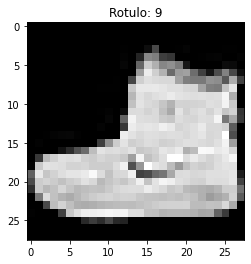

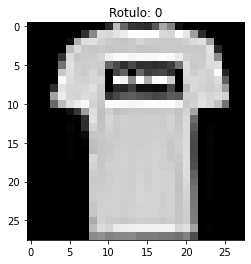

In [ ]:
import matplotlib.pyplot as plt

for i in range(2):
  dado, rotulo = dados_treino[i]

  plt.figure()
  plt.imshow(dado[0], cmap='gray')
  plt.title('Rotulo: '+ str(rotulo))

## DataLoader
O Dataloader tem for função gerenciar o carregamento de dados para o treinamento de redes neurais, trazendo diversas funções que auxiliam e otimizam o treino. Entre elas podemos citar:
- Embaralhamento dos dados
- Separação do dataset em batches
- Carregamento de batches em paralelo utilizando threads

Todas as funcionalidades citadas são controlados na criação (instanciação) do DataLoader.

In [ ]:
from torch.utils.data import DataLoader

dataloader_treino = DataLoader(dados_treino, 
                                batch_size=16, 
                                shuffle=True, 
                                num_workers=3)

dataloader_teste = DataLoader(dados_teste, 
                                batch_size=16, 
                                shuffle=True, 
                                num_workers=3)

## CUDA
Este pacote adiciona suporte para tipos de tensores CUDA, que implementam a mesma função dos tensores de CPU, mas usam GPUs para computação. <br>
Então, basicamente temos GPUs "disponíveis" no Colab para poder treinar! Antes de mais nada, habilite a opção para poder utilizar as GPUs do Colab:<br>
**Editar -> Configurações de notebook -> Acelerador de hardware -> selecione GPU -> Salvar** <br>
Por fim, é preciso ver se temos uma GPU disponível para utilizar:


In [ ]:
dispositivo = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Usando dispositivo de aceleração de hardware:', dispositivo)

Usando dispositivo de aceleração de hardware: cuda


Com isso, para poder rodar nosso modelo na GPU, precisamos enviar as partes pertinentes do nosso modelo para a GPU utilizando o comando ```.to(dispositivo)```. As partes que precisamos enviar para o dispositivo são:
- O modelo (ou seja, a rede neural em si);
- A função de custo;
- Dados e rótulos do batch
- Demais dados que serão utilizados, como as predições da rede.

Veja um exemplo de enviando o modelo para a GPU:

In [ ]:
rede = RedeSimples().to(dispositivo)

Por fim, para retornar um determinado dado para a CPU, basta fazer ```.cpu()```.

## Fluxo de Treinamento
O fluxo de treinamento de um modelo utilizando o PyTorch, em geral, é bem parecido em todos os casos. Os passos que devem ser executados são:
- Definir as funções de custo e o otimizador;
- Iterar nas épocas;
- Iterar nos batches;
- Cast dos dados no dispositivo de hardware (no nosso caso, 'cuda');
- Forward na rede e cálculo da loss
- Cálculo do gradiente e atualização dos pesos

Além disso, é interessante monitorarmos como nossa *loss* e nossa acurácia variam ao longo das épocas.

### Definindo as funções de custo e o otimizador

In [ ]:
from torch import optim

# Definição da função de custo
criterio = nn.CrossEntropyLoss().to(dispositivo)

# Definição do otimizador
otimizador = optim.Adam(rede.parameters(), lr=0.005)

print("Função de custo escolhida: " + str(criterio), end='\n\n')
print("Otimizador escolhido: " + str(otimizador))

Função de custo escolhida: CrossEntropyLoss()

Otimizador escolhido: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.005
    weight_decay: 0
)


### Loop de Treino

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Definição do número de épocas
num_epocas = 10

for epoca in range(num_epocas):

    batches_loss = []
    rotulos = []
    predicoes = []
    for batch in dataloader_treino:

        dado, rotulo = batch

        # Casting para a GPU
        dado   = dado.to(dispositivo)
        rotulo = rotulo.to(dispositivo)

        # Forward
        pred = rede.forward(dado)
        loss = criterio(pred, rotulo)
        batches_loss.append(loss.data.cpu())

        # Backward
        otimizador.zero_grad()
        loss.backward()
        otimizador.step()

        # Armazenamento de valores
        valores, indices = torch.max(pred.data.cpu(), -1)
        for idx in range(len(indices)):
            rotulos.append(rotulo.data.cpu()[idx])
            predicoes.append(indices[idx])
    
    batches_loss = np.asarray(batches_loss)
    batches_loss_media = batches_loss.mean()

    acuracia = accuracy_score(rotulos, predicoes) * 100

    print("Epoca %3d | Loss: %4.3f | Acc: %4.2f%%" % (epoca+1, batches_loss_media, acuracia))



Epoca   1 | Loss: 0.509 | Acc: 80.89%
Epoca   2 | Loss: 0.386 | Acc: 85.77%
Epoca   3 | Loss: 0.358 | Acc: 86.92%
Epoca   4 | Loss: 0.342 | Acc: 87.39%
Epoca   5 | Loss: 0.341 | Acc: 87.62%
Epoca   6 | Loss: 0.327 | Acc: 87.87%
Epoca   7 | Loss: 0.324 | Acc: 88.26%
Epoca   8 | Loss: 0.321 | Acc: 88.39%
Epoca   9 | Loss: 0.315 | Acc: 88.62%
Epoca  10 | Loss: 0.317 | Acc: 88.45%


### Avaliando o modelo
Por fim, vamos calcular a acurácia do modelo sobre o dataset de teste.

In [ ]:
for batch in dataloader_teste:

    dado, rotulo = batch

    dado   = dado.to(dispositivo)
    rotulo = rotulo.to(dispositivo)

    pred = rede.forward(dado.to(dispositivo))

    valores, indices = torch.max(pred.data.cpu(), -1)
    for idx in range(len(indices)):
        rotulos.append(rotulo.data.cpu()[idx])
        predicoes.append(indices[idx])
    
acuracia = accuracy_score(rotulos, predicoes) * 100

print("Acurácia final do modelo: %4.2f%%" % (acuracia))

Acurácia final do modelo: 88.26%
